In [70]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Loading the dataset
df = pd.read_csv(r"D:\GreatLakes\Projects\Credit_Card_Fraud\creditcard.csv")

In [72]:
# Top 5 values
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Missing Values

In [73]:
# Checking for null values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Duplicate values

In [74]:
# Checking duplicate values in data
df[df.duplicated]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [75]:
# dropping the duplicate values
df.drop_duplicates(inplace = True)

In [76]:
df[df.duplicated]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [77]:
df.shape

(283726, 31)

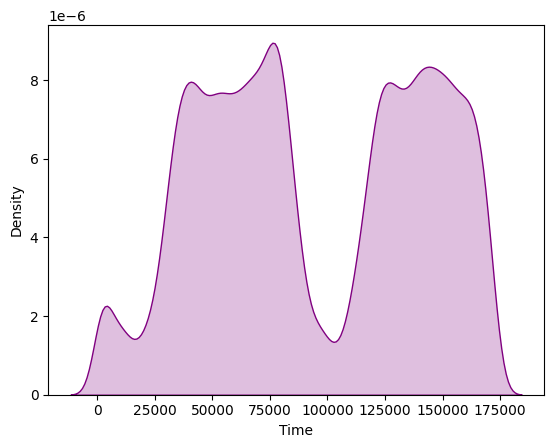

In [78]:
sns.kdeplot(df['Time'], fill =True, color = 'purple')
plt.show()

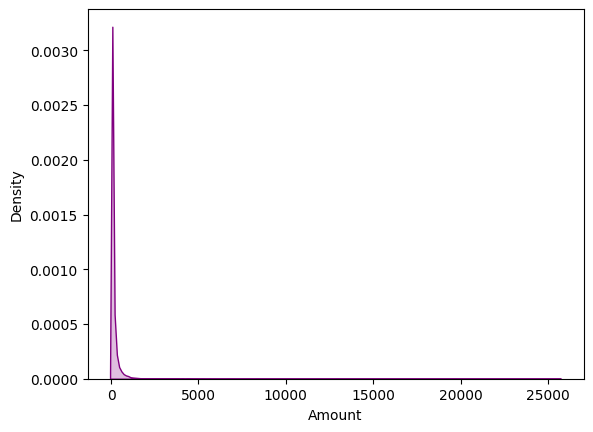

In [79]:
sns.kdeplot(df['Amount'], fill =True, color = 'purple')
plt.show()

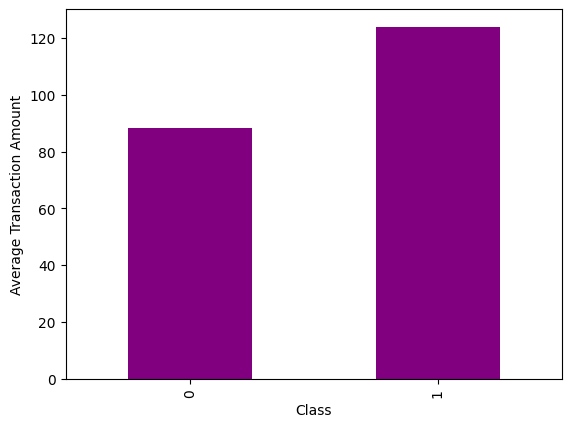

In [80]:
df.groupby(by = 'Class')['Amount'].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'purple')
plt.ylabel('Average Transaction Amount')
plt.show()

<Axes: ylabel='count'>

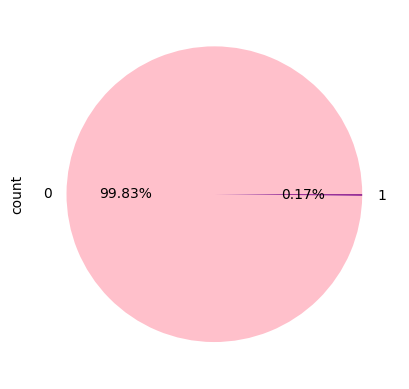

In [81]:
df['Class'].value_counts().plot(kind = 'pie', radius= 1, autopct = '%0.2f%%', colors = ['pink','purple'])

In [82]:
Fraud = df.loc[df['Class']==1,:]
Not_fraud = df.loc[df['Class']==0,:]

In [83]:
Fraud.describe()['Amount']

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [84]:
Not_fraud.describe()['Amount']

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [85]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

<Axes: >

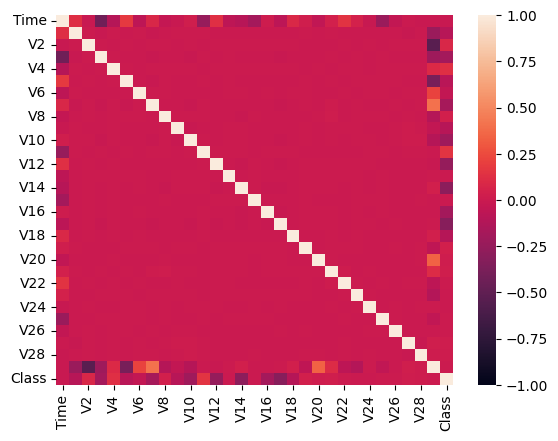

In [86]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'rocket')

### Outlier Treatment

In [87]:
attributes = ['V11', 'V4', 'V2', 'V12', 'V14', 'V17']

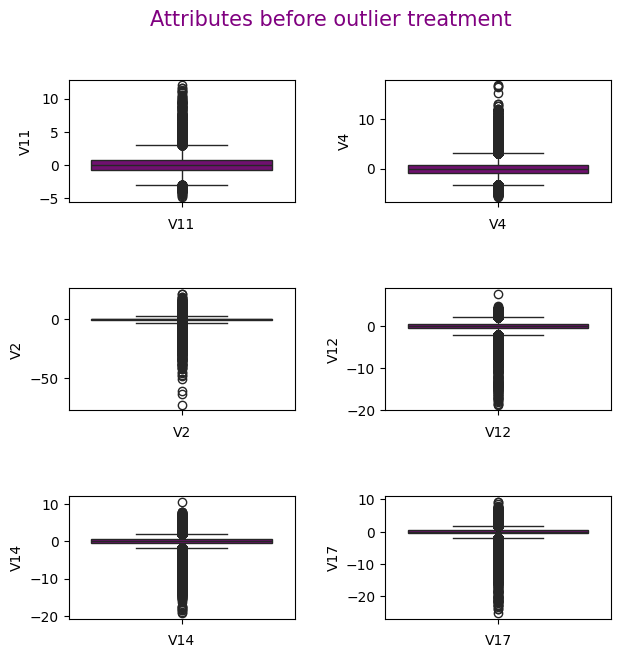

In [88]:
t = 1
plt.figure(figsize = (7,7))
plt.suptitle('Attributes before outlier treatment', color = 'purple', size = 15)
for i in attributes:
    plt.subplot(3,2,t)
    sns.boxplot(df[i], color = 'purple')
    plt.xlabel(i)
    t = t+1
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [89]:
for i in attributes:
    q1, q3 = df[i].quantile([0.25,0.75])
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    df1 = df[(df[i]>ul)|(df[i]<ll)]
    df[i] = df[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

In [90]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
102,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0
119,77.0,-1.165722,1.485337,0.156418,0.924378,0.131746,0.996965,-0.167117,1.262617,-0.584844,...,0.314752,1.046648,0.156404,-0.628123,-0.702367,-0.224025,0.145425,0.116398,11.83,0
134,83.0,-1.897331,0.955626,0.052543,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,...,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284633,172625.0,-1.656560,-0.303334,-1.090303,0.908557,-0.014432,-0.783958,1.664815,0.163085,-0.401611,...,0.242880,-0.111603,0.625198,-0.287188,0.153288,-0.148358,-0.057845,0.042227,387.92,0
284638,172629.0,-1.691097,-0.066182,-0.746594,-0.496544,0.867330,-1.118658,2.945484,-0.510813,-1.083929,...,0.162968,-0.292177,0.422693,-0.209257,1.071036,0.669654,-0.388434,-0.099326,430.00,0
284719,172710.0,-1.277262,1.220425,0.242496,-0.569520,0.279860,1.338384,0.850880,-1.294627,0.187376,...,1.302757,-0.836415,-0.073722,-1.206612,0.429807,0.239488,0.246824,0.029778,157.04,0
284782,172767.0,-0.268061,2.540315,-1.400915,3.124319,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0


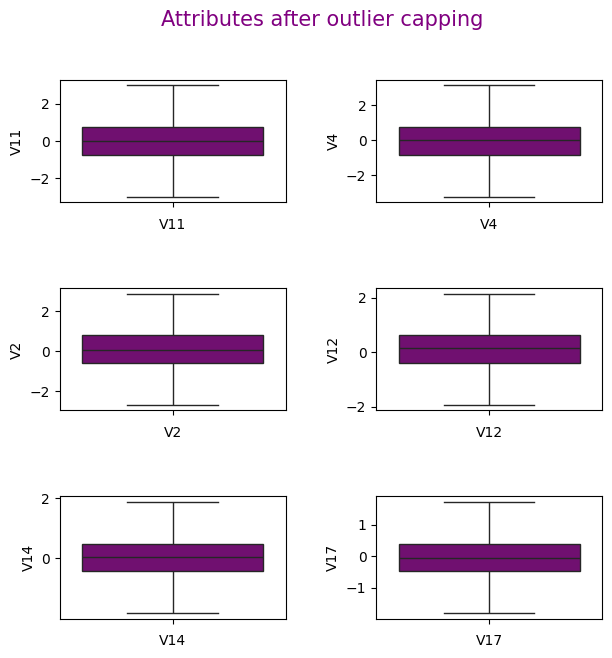

In [91]:
t = 1
plt.figure(figsize = (7,7))
plt.suptitle('Attributes after outlier capping', color = 'purple', size = 15)
for i in attributes:
    plt.subplot(3,2,t)
    sns.boxplot(df[i], color = 'purple')
    plt.xlabel(i)
    t = t+1
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [92]:
Q1, Q3 = df['Amount'].quantile([0.25,0.75])
IQR = Q3-Q1
LL = Q1-1.5*IQR
UL = Q3+1.5*IQR
df1 = df[(df['Amount']>UL)|(df['Amount']<LL)]
df['Amount']=df['Amount'].transform(lambda x: UL if x>UL else LL if x<LL else x)

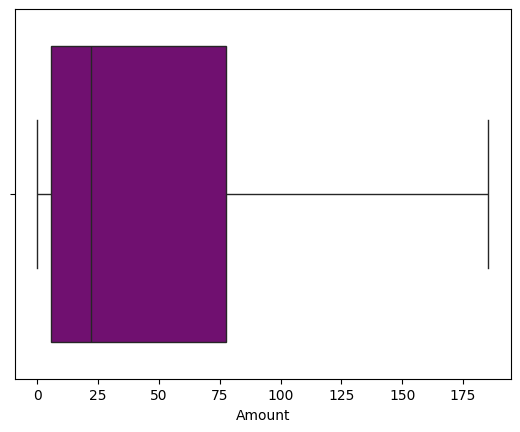

In [93]:
sns.boxplot(df, x = 'Amount', color = 'purple')
plt.show()

In [94]:
dfm = df[attributes]

In [95]:
dfm['Amount'] = df['Amount']

In [96]:
dfm[['Time','Class']] = df[['Time', 'Class']]

In [97]:
dfm.head()

,V11,V4,V2,V12,V14,V17,Amount,Time,Class
0,-0.551600,1.378155,-0.072781,-0.617801,-0.311169,0.207971,149.620,0.0,0
1,1.612727,0.448154,0.266151,1.065235,-0.143772,-0.114805,2.690,0.0,0
2,0.624501,0.379780,-1.340163,0.066084,-0.165946,1.109969,185.375,1.0,0
3,-0.226487,-0.863291,-0.185226,0.178228,-0.287924,-0.684093,123.500,1.0,0
4,-0.822843,0.403034,0.877737,0.538196,-1.119670,-0.237033,69.990,2.0,0


### Train_test_split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
y = dfm['Class']
x = dfm.loc[:, dfm.columns != 'Class']

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size= 0.2, stratify=y)

In [101]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(226980, 8) (56746, 8) (226980,) (56746,)


In [102]:
y_train.value_counts()

Class
0    226602
1       378
Name: count, dtype: int64

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
st = SMOTE(sampling_strategy=0.9)
x_train_s, y_train_s = st.fit_resample(x_train,y_train)

In [105]:
y_train_s.value_counts(normalize=True)

Class
0    0.526317
1    0.473683
Name: proportion, dtype: float64

### Logistic Regression (Base Model)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report

In [107]:
lr = LogisticRegression(penalty='l2')
model_lr = lr.fit(x_train_s, y_train_s)

In [108]:
y_preds_lr = model_lr.predict_proba(x_test)[:,1]
y_predh_lr = (y_preds_lr>0.5).astype(int)

In [109]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_lr)}')
print(f'f1_score: {f1_score(y_test,y_predh_lr)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_lr)}')
print(f'Classification Report: {classification_report(y_test,y_predh_lr)}')

Confusion_Matrix: [[50617  6034]
 [    8    87]]
f1_score: 0.027992277992277995
roc_auc_score: 0.9046388366814726
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94     56651
           1       0.01      0.92      0.03        95

    accuracy                           0.89     56746
   macro avg       0.51      0.90      0.49     56746
weighted avg       1.00      0.89      0.94     56746



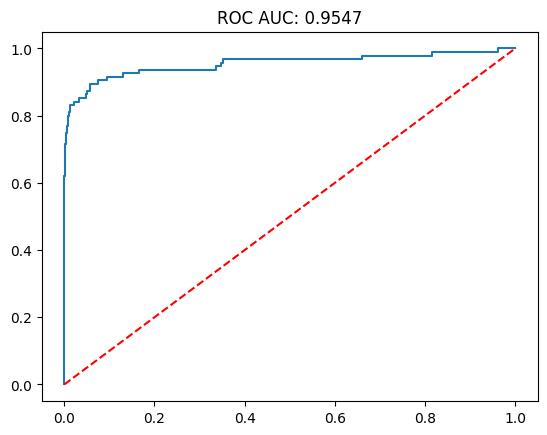

In [110]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_lr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_lr),4)}')
plt.show()

### KNN Classifier 

In [111]:
# In order to use KNN we need to standardize all the numerical variables, since attributes used to make model are already 
# standardized other than time and amount, hence these two are standardized below using Standard Scaler

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
x_train_ss = x_train_s.copy()
x_test_ss = x_test.copy()

In [115]:
ss = StandardScaler()
x_train_ss[['Time', 'Amount']] = ss.fit_transform(x_train_ss[['Time', 'Amount']])

In [117]:
x_test_ss[['Time','Amount']]= ss.transform(x_test_ss[['Time','Amount']])

In [121]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
model_knn = knn.fit(x_train_ss,y_train_s)

In [122]:
y_preds_knn = model_knn.predict_proba(x_test_ss)[:,1]
y_predh_knn = (y_preds_knn>0.5).astype(int)

In [125]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_knn)}')
print(f'f1_score: {f1_score(y_test,y_predh_knn)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_knn)}')
print(classification_report(y_test,y_predh_knn))

Confusion_Matrix: [[56341   310]
 [   14    81]]
f1_score: 0.33333333333333337
roc_auc_score: 0.9235797389185307
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.21      0.85      0.33        95

    accuracy                           0.99     56746
   macro avg       0.60      0.92      0.67     56746
weighted avg       1.00      0.99      1.00     56746



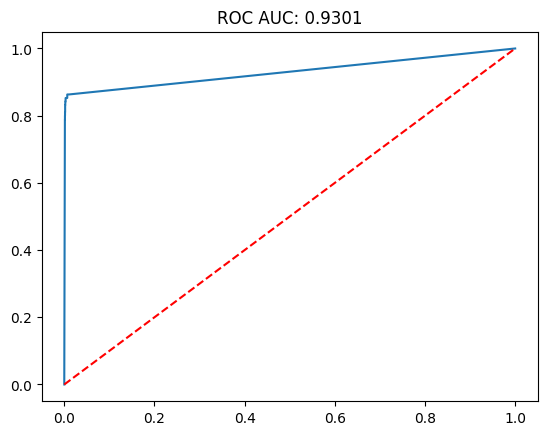

In [126]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_knn)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_knn),4)}')
plt.show()

In [127]:
cross_val_score(estimator=KNeighborsClassifier(n_neighbors=10, weights='distance'),X=x_train_ss,y=y_train_s, scoring='roc_auc',cv=7)

array([0.99910407, 0.99947459, 0.99913463, 0.99927358, 0.99916557,
       0.99930477, 0.99936615])

### XGBoost using GridSearchCV

In [131]:
grid = {'max_depth':[5,6], 'learning_rate':[0.1,0.2], 'gamma': [0.1,0.2]}
gscv = GridSearchCV(estimator=XGBClassifier(n_estimators=100), param_grid=grid, cv=5, scoring='roc_auc')
model_cv = gscv.fit(x_train_s, y_train_s)

In [132]:
model_cv.best_params_

{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6}

In [133]:
xgb = XGBClassifier(n_estimators=100, **model_cv.best_params_)
model_xgb = xgb.fit(x_train_s,y_train_s)

In [134]:
y_preds_xgb = model_xgb.predict_proba(x_test)[:,1]
y_predh_xgb = (y_preds_xgb>0.5).astype(int)

In [136]:
print(f'Confusion_Matrix: {confusion_matrix(y_test,y_predh_xgb)}')
print(f'f1_score: {f1_score(y_test,y_predh_xgb)}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_predh_xgb)}')
print(classification_report(y_test,y_predh_xgb))

Confusion_Matrix: [[56513   138]
 [   16    79]]
f1_score: 0.5064102564102564
roc_auc_score: 0.9145714898886905
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.36      0.83      0.51        95

    accuracy                           1.00     56746
   macro avg       0.68      0.91      0.75     56746
weighted avg       1.00      1.00      1.00     56746



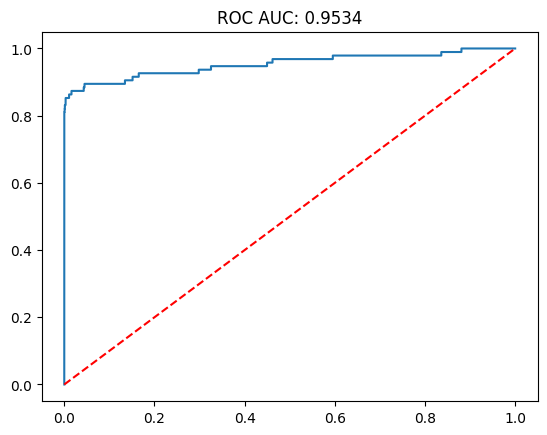

In [137]:
fpr,tpr,threshold = roc_curve(y_test,y_preds_xgb)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red',ls='--')
plt.title(f'ROC AUC: {round(roc_auc_score(y_test,y_preds_xgb),4)}')
plt.show()

In [138]:
cross_val_score(estimator=XGBClassifier(n_estimators=100, gamma= 0.1, learning_rate= 0.2, max_depth= 6),X=x_train_s,y=y_train_s, scoring='roc_auc',cv=7)

array([0.99987701, 0.99996068, 0.99992962, 0.99995732, 0.99993093,
       0.99996166, 0.99993115])